Explore various output diagnostics from ESM4 pre-industrial control run

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import gsw

In [2]:
# Specify the location of the files for cobalt and ocean variables
rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'
name_cobalt = 'ocean_cobalt_omip_tracers_year_z'
name_mom6 = 'ocean_annual_z'
ext = '/av/annual_5yr/'
time = '.0941-0945.'
path_cobalt = rootdir+name_cobalt+ext+name_cobalt+time+'ann.nc'
path_mom6 = rootdir+name_mom6+ext+name_mom6+time+'ann.nc'

In [4]:
# Load data
# ds_cobalt = xr.open_dataset(path_cobalt, decode_times='False')
ds_mom6 = xr.open_dataset(path_mom6, decode_times='False')
ds_mom6
# Calculate density
sigma2 = xr.full_like(ds_mom6.thetao,gsw.sigma2(ds_mom6.so,ds_mom6.thetao))
#sigma2.values = 
sigma2.name = 'sigma2'
ds_mom6 = xr.merge([ds_mom6,sigma2])

/nbhome/gam/miniconda/envs/mom6-clean/lib/python3.8/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


### Lat-lon

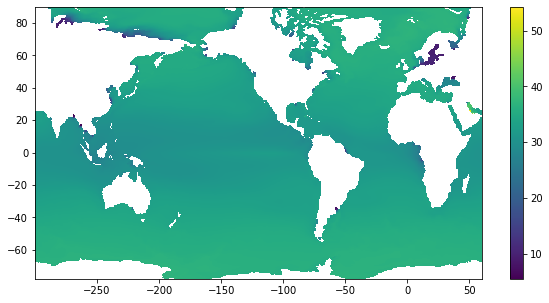

In [60]:
varstr = 'sigma2'
z = 0
clims = [0,0.01]
var = ds_mom6[varstr].sel(z_l = z,method='nearest').squeeze()
fig, ax = plt.subplots(figsize=(10,5))
im = ax.pcolormesh(ds_cobalt.xh,ds_cobalt.yh,var)
#im.set_clim(clims)
plt.colorbar(im,ax=ax)

### Depth profile (lat-lon mean)

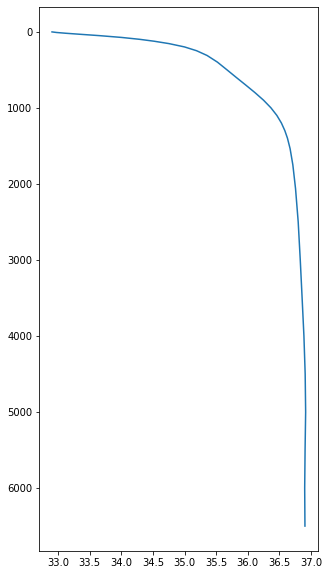

In [67]:
varstr = 'sigma2'
wstr = 'volcello'
vC = ds_mom6[varstr]*ds_cobalt[wstr]
var = vC.sum(dim=['xh','yh'],skipna=True)/ds_cobalt[wstr].sum(dim = ['xh','yh'],skipna=True)
var = var.squeeze()
fig,ax = plt.subplots(figsize = (5,10))
ax.plot(var,ds_cobalt.z_l)
ax.invert_yaxis()

### Depth profile (lat-lon sum)

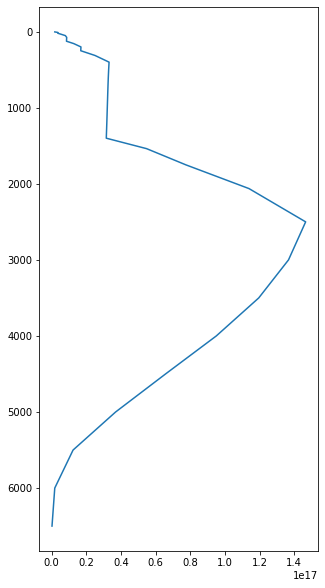

In [66]:
var = ds_cobalt.volcello.sum(dim=['xh','yh'],skipna=True).squeeze()
fig,ax = plt.subplots(figsize = (5,10))
ax.plot(var,ds_cobalt.z_l)
ax.invert_yaxis()

# Temperature and salinity surface forcing

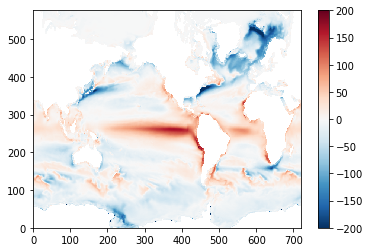

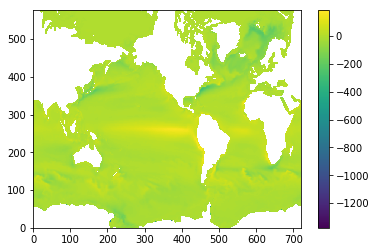

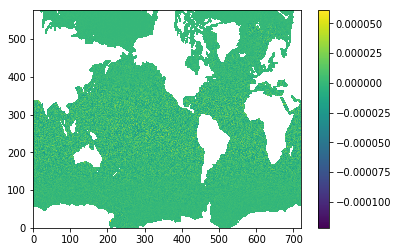

In [38]:
# Net heat from atmospheric coupler (SW, LW, sensible, latent)
im = plt.pcolormesh(ds.net_heat_coupler.isel(time=0),cmap="RdBu_r")
plt.colorbar(im)
plt.clim([-200,200])
plt.show()
# Sum of individual heat fluxes
hf=ds.rlntds+ds.rsntds+ds.hfsso+ds.hflso
im = plt.pcolormesh(hf.isel(time=0))
plt.colorbar(im)
plt.show()
# Difference
im = plt.pcolormesh(ds.net_heat_coupler.isel(time=0)-hf.isel(time=0))
plt.colorbar(im)
plt.show()

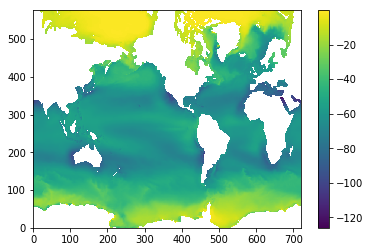

In [29]:
# Longwave at ocean surface
im = plt.pcolormesh(ds.rlntds.isel(time=0))
plt.colorbar(im)
plt.show()

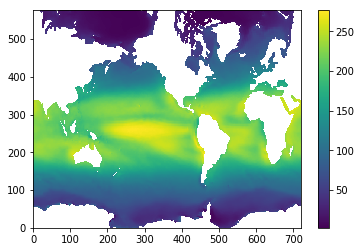

In [30]:
# Shortwave at cell upper interfaces (3D distribution)
im = plt.pcolormesh(ds.rsdo.isel(zi=0,time=0))
plt.colorbar(im)
plt.show()

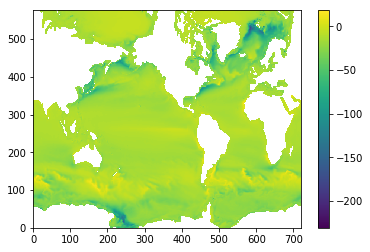

In [31]:
# Sensible at ocean surface
im = plt.pcolormesh(ds.hfsso.isel(time=0))
plt.colorbar(im)
plt.show()

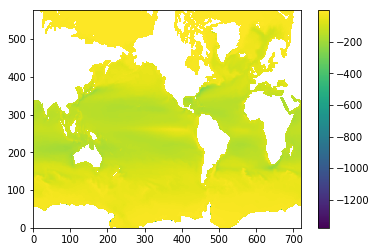

In [32]:
# Latent at ocean surface
im = plt.pcolormesh(ds.hflso.isel(time=0))
plt.colorbar(im)
plt.show()

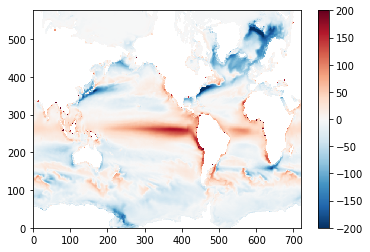

In [39]:
# Total heat flux at surface
im = plt.pcolormesh(ds.hfds.isel(time=0),cmap='RdBu_r')
plt.colorbar(im)
plt.clim([-200,200])
plt.show()